### Steps used in this project 
1- Importing Libraries                                                                                                 
2- Data collection and analysis                                                                                                 
3- Data Visualization                                                                                                           
4- Data Processing and Scaling                                                                                                   
5- Training The SVM Model                                                                                                       
6- Model Evaluation                                                                                                             
7- Making a Predictive System                                                           
8- Saving the trained model

## Importing  Libraries

In [3]:
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  #  (-1,1)
from sklearn.model_selection import train_test_split

from sklearn import svm        

from sklearn.metrics import accuracy_score

## Data collection and analysis

In [5]:
# Loading the diabetes dataset to pandas dataframe
diabetes_dataset = pd.read_csv("diabetes.csv")   

In [6]:
# printing first 5 rows of dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# printing last 5 rows of dataset
diabetes_dataset.tail()        

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [9]:
# check null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# check null values
diabetes_dataset.duplicated().sum()

0

In [11]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [12]:
# Sum of values equal zero in each column
for col in diabetes_dataset[select_col]:
    print('{}:'.format(col) , diabetes_dataset[diabetes_dataset[col]==0].value_counts().sum())

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [13]:
# Value of median 
diabetes_dataset.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [14]:
# Replacing the values equal to 0 by the median
for col in diabetes_dataset[select_col]:
    diabetes_dataset.loc[:,col].replace(0, diabetes_dataset.loc[:,col].median(), inplace=True)

In [15]:
# Sum of values equal zero in each column after replacing the values equal to 0 by the median
for col in diabetes_dataset[select_col]:
    print('{}:'.format(col) , diabetes_dataset[diabetes_dataset[col]==0].value_counts().sum())

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


In [16]:
# There is not NaN or null values in columns
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


## Data Visualization

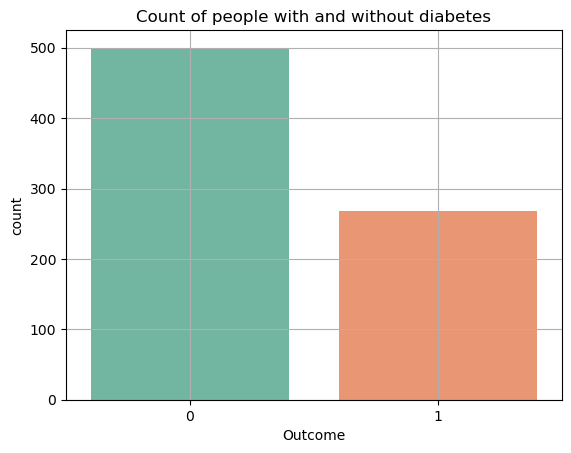

In [18]:
# Outcome 
sns.countplot(x='Outcome', data= diabetes_dataset , palette='Set2')
plt.title('Count of people with and without diabetes')
plt.grid()

In [19]:
# getting number of diabetic and non_diabetic
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

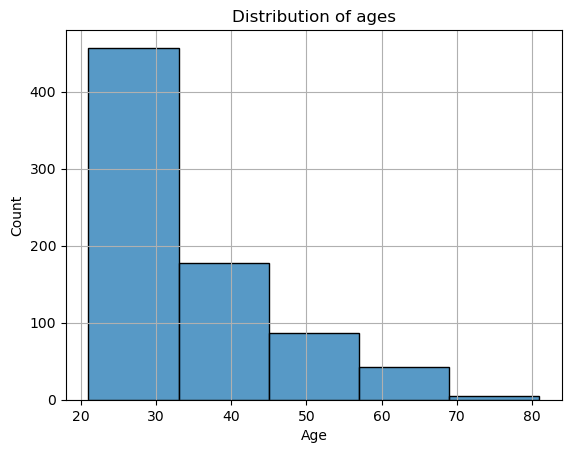

In [20]:
# Ages
sns.histplot(diabetes_dataset['Age'], bins=5)
plt.title('Distribution of ages')
plt.grid()

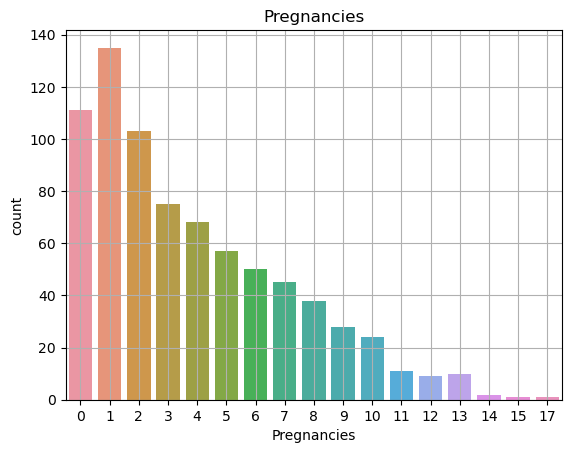

In [21]:
# Pregnancy 
sns.countplot(x='Pregnancies', data= diabetes_dataset)
plt.title('Pregnancies')
plt.grid()

In [22]:
diabetes_dataset['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

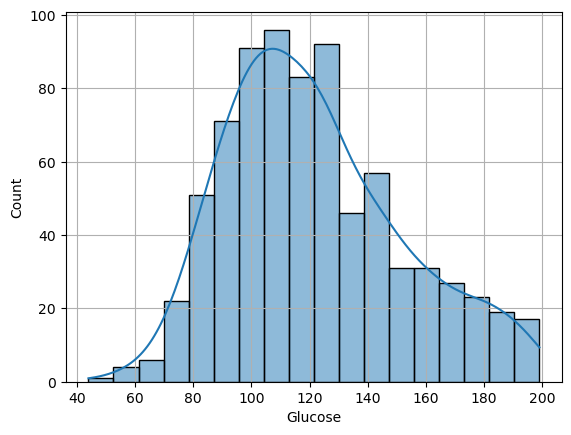

In [23]:
# Glucose
sns.histplot(diabetes_dataset['Glucose'], kde=True)
plt.grid()

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


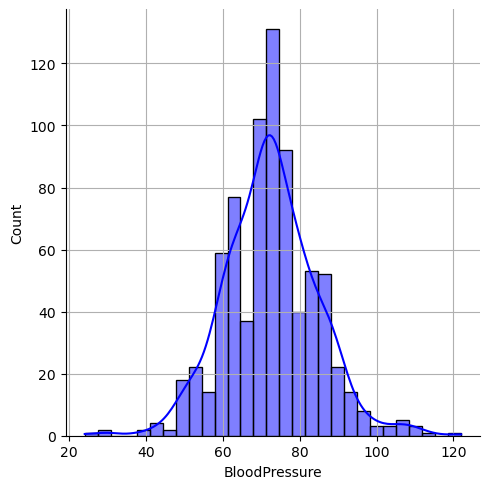

In [24]:
# BloodPressure
sns.displot(diabetes_dataset['BloodPressure'] , kde=True , color='blue')
plt.grid()

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


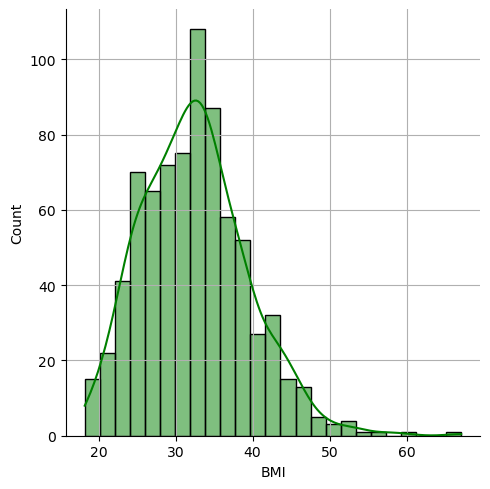

In [25]:
sns.displot(diabetes_dataset['BMI'], kde=True, color='green')
plt.grid()

### Correlations
We'll observing the correlation wich exist between all the variables.



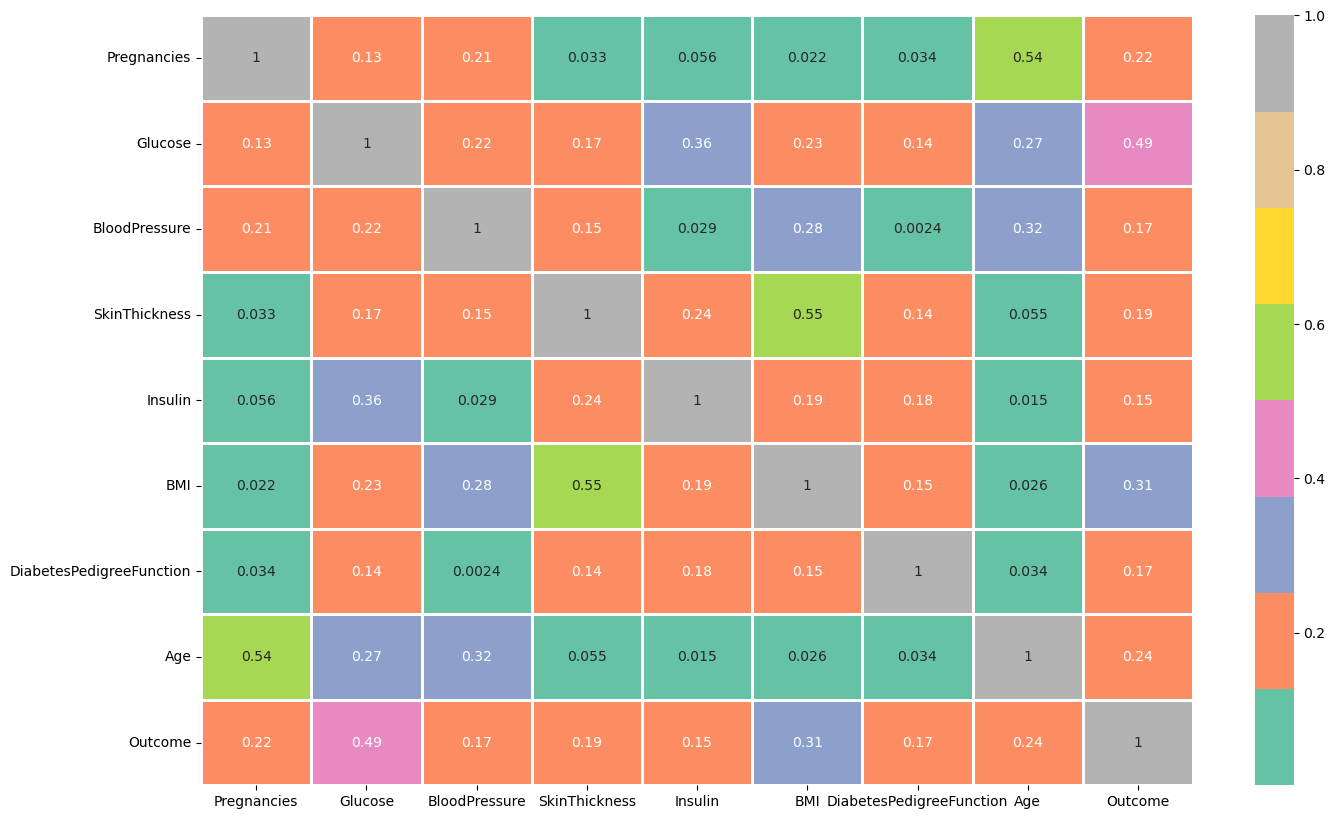

In [27]:
plt.figure(figsize=(16,10))
corr = diabetes_dataset.corr()
sns.heatmap(abs(corr), lw=1, annot=True, cmap='Set2')
plt.show()

## Data Processing and Scaling
We'll split the data into training and testing sets. Then we'll scale using StandarScale.

1- For the training and testing data we'll use train_test_split from sklearn.model_selection                                             
2- For scaling we'll use StandardScaler from sklearn.preprocessing

In [29]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [30]:
# printing shape of x and y
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [31]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [32]:
print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [33]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [34]:
# print the values of x and y after scale
print(X)
print(Y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train Test Split to the dataset

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=45,shuffle= True)

In [37]:
# print shape of x after split
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training The SVM Model

In [39]:
classifier = svm.SVC(kernel='linear')

In [40]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation
### Accuracy score

In [42]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [44]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7402597402597403


## Making a Predictive System

In [47]:
input_data = (6,200,79,19,175,25.8,0.587,51)
 
    
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.63994726  2.57553285  0.54706018 -0.90367905  0.76174179 -0.96798414
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
input_data_reshaped

array([[  6.   , 200.   ,  79.   ,  19.   , 175.   ,  25.8  ,   0.587,
         51.   ]])

## Saving the trained model

In [50]:
import pickle

In [51]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [52]:
# loading the saved model
loaded_model = pickle.load(open('C:/Users/moham/Projects/Diabetes/trained_model.sav', 'rb'))

In [95]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
